# 基于Logistic回归和Sigmoid函数的分类

## 基于梯度上升法确定最佳回归系数

梯度上升算法迭代公式：
    $w = w + \alpha\bigtriangledown_{w}f(w)$

其中 w 为我们要找到的最佳参数

平方损失函数：
    $f(w) = \sum_{i=0}^n (y_{i} - w_{i}x_{i})^2$
    
求$\min f(w)$：
    $\bigtriangledown f(w) = \frac{\partial f(w)} {\partial w}= -2 \sum_{i=0}^n (y_{i} - w_{i}x_{i})x_{i} $

其中 $y_{i} - w_{i}x_{i}$为误差值

我们使用Sigmoid函数进行分类，他的计算公式如下：
    $\sigma(z) = \frac{1}{1 + e^{-z}}$
    
其中 $ z = \sum_{i=0}^{n} w_{i}x_{i}$ 作为分类器的输入数据

### 导入数据

In [1]:
def load_data(filename):
    datamat = []
    labelmat = []
    fr = open(filename)
    for line in fr.readlines():
        cur_line = line.strip().split()
        datamat.append([1.0, float(cur_line[0]), float(cur_line[1])])
        labelmat.append(int(cur_line[2]))
    fr.close()
    return datamat, labelmat

In [2]:
dataset, label = load_data(r'testSet.txt')

### sigmoid函数

In [3]:
import numpy as np
def sigmoid(inX):
    return 1.0/(1 + np.exp(-inX))

### 计算梯度

In [4]:
def grad(datamat,label):
    data_mat = np.mat(datamat)
    label_mat = np.mat(label).transpose()
    m, n = np.shape(data_mat)
    alpha = 0.001
    max_cycle = 500
    weight = np.ones((n,1))
    for i in range(max_cycle):
        h = sigmoid(data_mat * weight)
        error = label_mat - h
        weight = weight + alpha * data_mat.transpose() * error
    return weight.getA()

In [5]:
weight = grad(dataset, label)
print(weight)

[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


### 画出决策边界

In [6]:
import matplotlib.pyplot as plt
def plot_bestfit(weight):
    data_arr = np.array(dataset)
    m = np.shape(dataset)[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(m):
        if int(label[i] == 1):
            xcord1.append(data_arr[i, 1])
            ycord1.append(data_arr[i, 2])
        else:
            xcord2.append(data_arr[i, 1])
            ycord2.append(data_arr[i, 2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='blue')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weight[0]-weight[1]*x)/weight[2]
    ax.plot(x, y)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

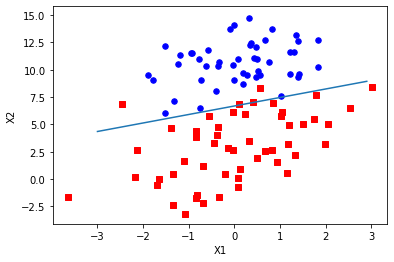

In [7]:
plot_bestfit(weight)

## 梯度上升法的改进——随机梯度上升法
* 梯度上升法每次更新回归系数时都需遍历整个数据集，我们改进此步骤，一次仅用一个样本点来更新回归系数

In [8]:
def stoc_grad_1(data_mat, label_mat):
    data_mat = np.array(data_mat)
    m, n = np.shape(data_mat)
    alpha = 0.01
    weight = np.ones(n)
    for i in range(m):
        h = sigmoid(sum(data_mat[i] * weight))
        error = label_mat[i] - h
#         print(error)
        weight = weight + alpha * error * data_mat[i]
    return weight

In [9]:
weight = stoc_grad_1(dataset, label)

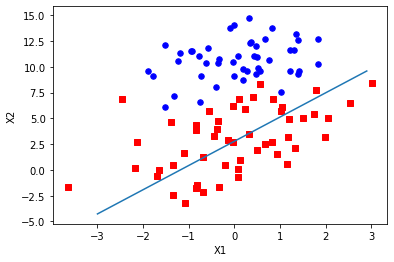

In [10]:
plot_bestfit(weight)

#### 随机梯度上升算法是在整个数据集上迭代了500次得到的，系数的收敛性不好
* 改进步长，alpha每次迭代时都需要调整

In [11]:
def stoc_grad_2(data_mat, label_mat, num_iter=150):
    data_mat = np.array(data_mat)
    m, n = np.shape(data_mat)
    weight = np.ones(n)
    for j in range(num_iter):
        data_index = list(range(m))
        for i in range(m):
            alpha = 4/(1.0 + j + i) + 0.01
            rand_index = int(np.random.uniform(0, len(data_index)))
            h = sigmoid(sum(data_mat[rand_index] * weight))
            error = label_mat[rand_index] - h
            weight = weight + alpha * error * data_mat[rand_index]
            del(data_index[rand_index])
    return weight

In [12]:
weight = stoc_grad_2(dataset, label)

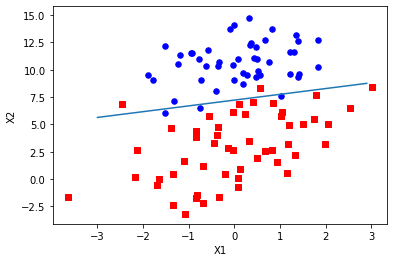

In [13]:
plot_bestfit(weight)

## 实例：从疝气病预测病马的死亡率
### Step 1：处理数据集中的缺失值
一般处理方式：
* 可用特征均值填补
* 特殊值填补
* 忽略有缺失值的样本
* 相似样本的均值填补
* 算法预测缺失值

本次使用特殊值0来替换缺失值，丢弃标签缺失的数据

In [14]:
def classify(inX, weight):
    prob = sigmoid(sum(inX * weight))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0

In [15]:
def colic_test():
    fr_train = open('horseColicTraining.txt')
    fr_test = open('horseColicTest.txt')
    train_set = []
    label_set = []
    for line in fr_train.readlines():
        curline = line.strip().split('\t')
        line_arr = []
        for i in range(21):
            line_arr.append(float(curline[i]))
        train_set.append(line_arr)
        label_set.append(float(curline[21]))
    train_weigh = stoc_grad_2(train_set, label_set, 500)
    error_count = 0
    test_num = 0
    for line in fr_test.readlines():
        test_num += 1
        curline = line.strip().split('\t')
        line_arr = []
        for i in range(21):
            line_arr.append(float(curline[i]))
        if classify(line_arr, train_weigh) != float(curline[21]):
            error_count += 1
    error_rate = float(error_count)/test_num
    print('错误率为%f' %error_rate)
    return error_rate

In [16]:
def multi_test():
    test_num = 10
    error_sum = 0.0
    for k in range(10):
        error_sum += colic_test()
    print('进行%d次迭代后，平均错误率为%f' %(test_num, error_sum/float(test_num)))

In [17]:
multi_test()
# colic_test()
# fr_train = open('horseColicTraining.txt')
# train_set = []
# label_set = []
# for line in fr_train.readlines():
#         curline = line.strip().split('\t')
#         line_arr = []
#         for i in range(21):
#             line_arr.append(float(curline[i]))
#         train_set.append(line_arr)
#         label_set.append(float(curline[21]))
# train_weigh = stoc_grad_2(train_set, label_set, 500)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


错误率为0.343284
错误率为0.343284
错误率为0.313433
错误率为0.298507
错误率为0.358209
错误率为0.283582
错误率为0.388060
错误率为0.298507
错误率为0.432836
错误率为0.358209
进行10次迭代后，平均错误率为0.341791
